In [37]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"

import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch

In [184]:
from tools.utils import *
from tools.loss import *
from tools.metrics import *

In [190]:
preds = torch.load("../test/prediction.pt")
gt = torch.load("../test/ground_truth.pt")
oods = torch.load("../test/oods.pt")
ep = torch.load("../test/epistemic.pt")
raw = torch.load("../test/raw.pt")

In [216]:
pre_preds = torch.load("../test2/prediction.pt")
pre_gt = torch.load("../test2/ground_truth.pt")
oods = torch.load("../test2/oods.pt")
pre_ep = torch.load("../test2/epistemic.pt")
pre_raw = torch.load("../test2/raw.pt")

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 pre_preds = torch.load("../test2/prediction.pt")                                             │
│   2 pre_gt = torch.load("../test2/ground_truth.pt")                                              │
│   3 oods = torch.load("../test2/oods.pt")                                                        │
│   4 pre_ep = torch.load("../test2/epistemic.pt")                                                 │
│                                                                                                  │
│ /data/bny220000/projects/ubev/venv/lib/python3.9/site-packages/torch/serialization.py:771 in     │
│ load                                                                                             │
│                                                                                                  │
│    768 │   if 'encoding' not in pickle_load_args.keys():                                         │
│    769 │   │   pickle_load_args['encoding'] = 'utf-8'                                            │
│    770 │                                                                                         │
│ ❱  771 │   with _open_file_like(f, 'rb') as opened_file:                                         │
│    772 │   │   if _is_zipfile(opened_file):                                                      │
│    773 │   │   │   # The zipfile reader is going to advance the current file position.           │
│    774 │   │   │   # If we want to actually tail call to torch.jit.load, we need to              │
│                                                                                                  │
│ /data/bny220000/projects/ubev/venv/lib/python3.9/site-packages/torch/serialization.py:270 in     │
│ _open_file_like                                                                                  │
│                                                                                                  │
│    267                                                                                           │
│    268 def _open_file_like(name_or_buffer, mode):                                                │
│    269 │   if _is_path(name_or_buffer):                                                          │
│ ❱  270 │   │   return _open_file(name_or_buffer, mode)                                           │
│    271 │   else:                                                                                 │
│    272 │   │   if 'w' in mode:                                                                   │
│    273 │   │   │   return _open_buffer_writer(name_or_buffer)                                    │
│                                                                                                  │
│ /data/bny220000/projects/ubev/venv/lib/python3.9/site-packages/torch/serialization.py:251 in     │
│ __init__                                                                                         │
│                                                                                                  │
│    248                                                                                           │
│    249 class _open_file(_opener):                                                                │
│    250 │   def __init__(self, name, mode):                                                       │
│ ❱  251 │   │   super(_open_file, self).__init__(open(name, mode))                                │
│    252 │                                                                                         │
│    253 │   def __exit__(self, *args):                                                            │
│    254 │   │   self.file_like.close()                      

In [217]:
torch.mean(raw)

tensor(41.3374)

In [218]:
torch.mean(pre_raw)

tensor(46.3077)

In [214]:
print(uce_loss(torch.tensor(raw), torch.tensor(gt)).mean(dim=(0, 2, 3)))
print(get_iou(preds, gt))

/tmp/ipykernel_2262023/1544894838.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  print(uce_loss(torch.tensor(raw), torch.tensor(gt)).mean(dim=(0, 2, 3)))


tensor([0.0179, 0.1684, 0.0395, 0.1228], dtype=torch.float64)
[0.3629091703295203, 0.4588436037441498, 0.09794612794612795, 0.8772554736318955]


In [215]:
print(uce_loss(torch.tensor(pre_raw), torch.tensor(pre_gt)).mean(dim=(0, 2, 3)))
print(get_iou(pre_preds, pre_gt))

/tmp/ipykernel_2262023/2850036318.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  print(uce_loss(torch.tensor(pre_raw), torch.tensor(pre_gt)).mean(dim=(0, 2, 3)))


tensor([0.0180, 0.2092, 0.0328, 0.1478], dtype=torch.float64)
[0.407639894844144, 0.5372772259567117, 0.3761815259731416, 0.8675100760152133]


In [207]:
ood_reg(torch.tensor(pre_raw), torch.tensor(oods))

/tmp/ipykernel_2262023/3543610024.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ood_reg(torch.tensor(pre_raw), torch.tensor(oods))


tensor(2.9844)

In [211]:
get_iou(pre_ep, oods[:, None])

[0.026223948577400083]

In [212]:
get_iou(ep, oods[:, None])

[0.0272475977359484]

In [61]:
mis = preds.argmax(axis=1) != gt.argmax(axis=1)

IndexError: index 1 is out of bounds for dimension 0 with size 1

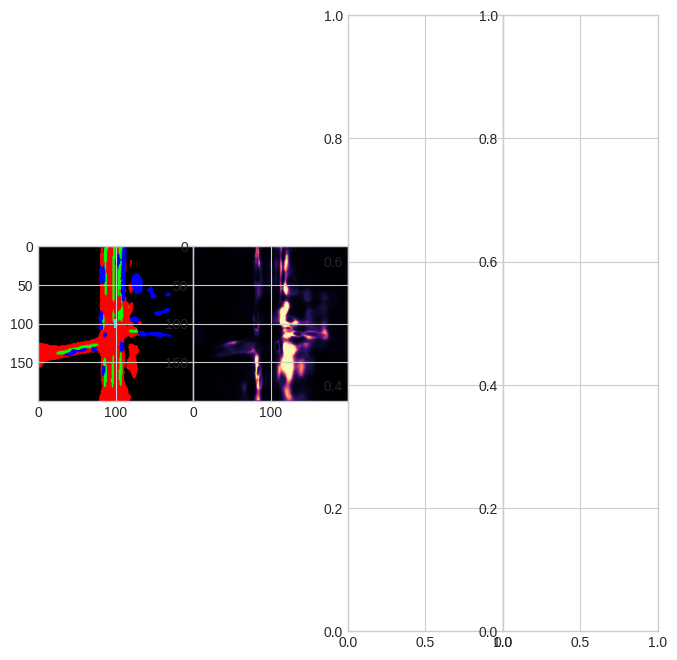

In [156]:
fig, axs = plt.subplots(1, 4, figsize=(8, 8))
fig.subplots_adjust(wspace=0, hspace=0)

axs[0].imshow(map_rgb(torch.tensor(preds[1]), ego=True) / 255)
axs[1].imshow(ep[1, 0], cmap="magma")
axs[2].imshow(oods[1], cmap="magma")
axs[3].imshow(mis[1], cmap="magma")                 

for ax in axs.flatten():
    ax.set_xticks([])
    ax.set_yticks([])

(-0.5, 199.5, 199.5, -0.5)

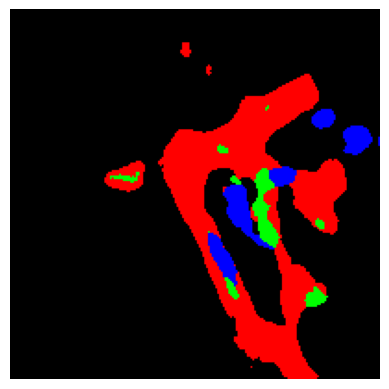

In [56]:
plt.imshow(map_rgb(torch.tensor(preds[0])) / 255)
plt.axis("off")

(-0.5, 199.5, 199.5, -0.5)

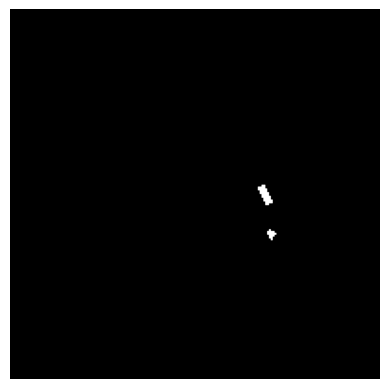

In [57]:
plt.imshow(1. - oods[0])
plt.axis("off")

In [226]:
alpha = torch.tensor([[
    [[300000]],
    [[1]],
    [[1]],
    [[1]],
]])

target = torch.tensor([[
    [[1]],
    [[0]],
    [[0]],
    [[0]],
]])

oods = torch.tensor([[1]])

In [220]:
alpha.shape

torch.Size([1, 4, 1, 1])

In [227]:
uce_loss(alpha, target)

tensor([[[[9.5368e-06]],

         [[0.0000e+00]],

         [[0.0000e+00]],

         [[0.0000e+00]]]])

In [222]:
ood_reg(alpha, oods) 

tensor(0.7359)